<a href="https://colab.research.google.com/github/Dev1561/090_DevParmar/blob/main/Lab4/090_Lab4_ClassifyingWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2: Apply algorithm on digits dataset - LabelEncoding of features: and Train test Division 80%-20%

---



In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from subprocess import call

In [2]:
data = datasets.load_wine()
dataset = pd.DataFrame(data.data, columns = data.feature_names)
print(f'Examples : {dataset.shape[0]}  and  Features : {dataset.shape[1]}')

Examples : 178  and  Features : 13


In [3]:
print(dataset.head())
print('\n\nFeatures  :  ', data.feature_names)
print('\nLabels  :  ', np.unique(data.target_names))

   alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0

[5 rows x 13 columns]


Features  :   ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Labels  :   ['class_0' 'class_1' 'class_2']


In [4]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.20, random_state = 89)


In [5]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 10)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
#Testing

y_pred = dtc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score  :  ', accuracy)

conf_matrix = confusion_matrix  (y_test, y_pred)
print('\nConfusion matrix  :  \n', conf_matrix)

precision = precision_score(y_test, y_pred, average = None)
print('\nPrecision Score  :  ', precision)

recall  = recall_score(y_test, y_pred, average = None)
print('\nRecall Score  :  ', recall)

Accuracy Score  :   0.9722222222222222

Confusion matrix  :  
 [[14  0  0]
 [ 0 14  0]
 [ 1  0  7]]

Precision Score  :   [0.93333333 1.         1.        ]

Recall Score  :   [1.    1.    0.875]


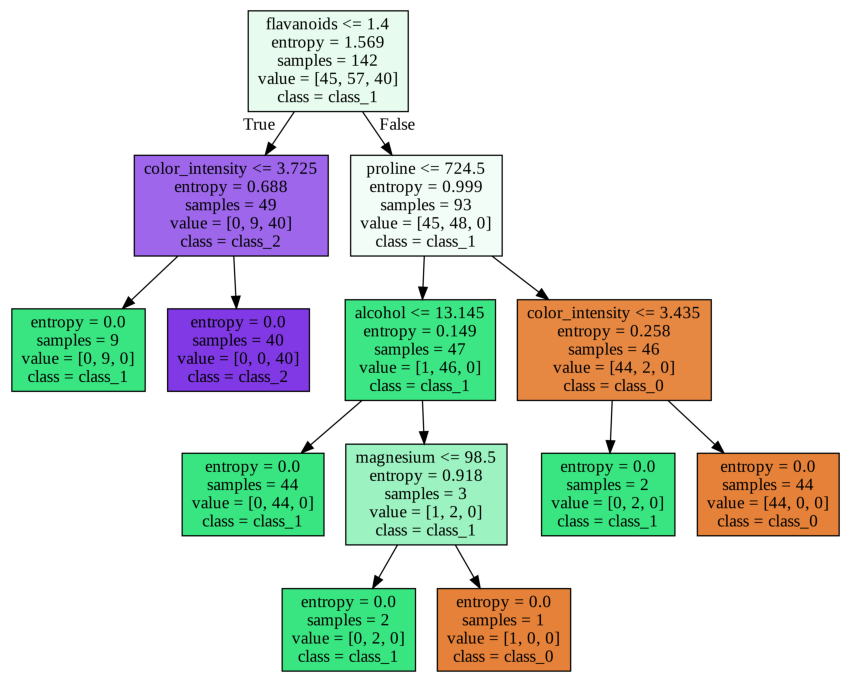

In [7]:
export_graphviz(dtc, out_file = 'wine_tree.dot', 
                feature_names = list(data.feature_names), 
                class_names = list(data.target_names), 
                filled = True)  

# Convert to png
call(['dot', '-Tpng', 'wine_tree.dot', '-o', 'wine_tree.png', '-Gdpi=600'])
plt.figure(figsize = (15, 20))
plt.imshow(plt.imread('wine_tree.png'))
plt.axis('off')
plt.show()